In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
# read all data - TBD type
data = pd.read_csv('ALL_Floor_clean_data_TBD.csv')

In [ ]:
data

,ClientMacAddr,localtime,Site,Level,lat,lng,date
0,00:00:11:11:31:10,2019-08-23 12:05:05,UK Office,2nd Floor,51.460346,-0.933065,2019-08-23
1,00:00:11:11:31:10,2019-08-23 12:05:15,UK Office,2nd Floor,51.460346,-0.933065,2019-08-23
2,00:00:11:11:31:10,2019-08-23 12:05:25,UK Office,2nd Floor,51.460346,-0.933065,2019-08-23
3,00:00:11:11:31:10,2019-08-23 12:05:35,UK Office,2nd Floor,51.460347,-0.933056,2019-08-23
4,00:00:11:11:31:10,2019-08-23 12:05:45,UK Office,2nd Floor,51.460347,-0.933056,2019-08-23
...,...,...,...,...,...,...,...
127366150,fd:9d:22:20:b6:a1,2020-08-26 13:46:46,UK Office,2nd Floor,51.460642,-0.932454,2020-08-26
127366151,fd:9d:22:20:b6:a1,2020-08-26 13:46:56,UK Office,2nd Floor,51.460642,-0.932454,2020-08-26
127366152,fd:9d:22:20:b6:a1,2020-08-26 13:47:04,UK Office,2nd Floor,51.460642,-0.932454,2020-08-26
127366153,fd:9d:22:20:b6:a1,2020-08-26 13:47:15,UK Office,2nd Floor,51.460642,-0.932454,2020-08-26


In [ ]:
daily_data = pd.read_csv('ALL_Floor_data_count_of_day.csv')
daily_data

,ClientMacAddr,count_of_day
0,00:00:11:11:31:10,3
1,00:02:f7:2f:7a:d1,1
2,00:04:4b:62:90:4e,1
3,00:06:c6:5a:a2:51,2
4,00:06:c6:8f:0a:35,1
...,...,...
113025,fc:f8:ae:5a:6f:ea,1
113026,fc:fc:48:36:16:6b,1
113027,fd:6a:eb:32:d4:cd,1
113028,fd:9a:58:da:cb:ea,1


In [ ]:
# delete the macid only appeared one day
del_data =  daily_data[daily_data['count_of_day']==1]['ClientMacAddr']
data = data[~data['ClientMacAddr'].isin(del_data)]
data

,ClientMacAddr,localtime,Site,Level,lat,lng,date
0,00:00:11:11:31:10,2019-08-23 12:05:05,UK Office,2nd Floor,51.460346,-0.933065,2019-08-23
1,00:00:11:11:31:10,2019-08-23 12:05:15,UK Office,2nd Floor,51.460346,-0.933065,2019-08-23
2,00:00:11:11:31:10,2019-08-23 12:05:25,UK Office,2nd Floor,51.460346,-0.933065,2019-08-23
3,00:00:11:11:31:10,2019-08-23 12:05:35,UK Office,2nd Floor,51.460347,-0.933056,2019-08-23
4,00:00:11:11:31:10,2019-08-23 12:05:45,UK Office,2nd Floor,51.460347,-0.933056,2019-08-23
...,...,...,...,...,...,...,...
127364167,fc:4d:d4:55:31:b4,2020-03-16 10:52:09,UK Office,1st Floor,51.460404,-0.933021,2020-03-16
127364168,fc:4d:d4:55:31:b4,2020-03-16 10:52:14,UK Office,1st Floor,51.460404,-0.933021,2020-03-16
127364169,fc:4d:d4:55:31:b4,2020-03-16 10:52:29,UK Office,1st Floor,51.460404,-0.933021,2020-03-16
127364170,fc:4d:d4:55:31:b4,2020-09-01 16:16:05,UK Office,2nd Floor,51.460397,-0.933210,2020-09-01


In [ ]:
data.dtypes

ClientMacAddr     object
localtime         object
Site              object
Level             object
lat              float64
lng              float64
date              object
dtype: object

In [ ]:
data['localtime'] = pd.to_datetime(data['localtime'])
data

/tmp/SLURM_14382937/ipykernel_8796/258283503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['localtime'] = pd.to_datetime(data['localtime'])


,ClientMacAddr,localtime,Site,Level,lat,lng,date
0,00:00:11:11:31:10,2019-08-23 12:05:05,UK Office,2nd Floor,51.460346,-0.933065,2019-08-23
1,00:00:11:11:31:10,2019-08-23 12:05:15,UK Office,2nd Floor,51.460346,-0.933065,2019-08-23
2,00:00:11:11:31:10,2019-08-23 12:05:25,UK Office,2nd Floor,51.460346,-0.933065,2019-08-23
3,00:00:11:11:31:10,2019-08-23 12:05:35,UK Office,2nd Floor,51.460347,-0.933056,2019-08-23
4,00:00:11:11:31:10,2019-08-23 12:05:45,UK Office,2nd Floor,51.460347,-0.933056,2019-08-23
...,...,...,...,...,...,...,...
127364167,fc:4d:d4:55:31:b4,2020-03-16 10:52:09,UK Office,1st Floor,51.460404,-0.933021,2020-03-16
127364168,fc:4d:d4:55:31:b4,2020-03-16 10:52:14,UK Office,1st Floor,51.460404,-0.933021,2020-03-16
127364169,fc:4d:d4:55:31:b4,2020-03-16 10:52:29,UK Office,1st Floor,51.460404,-0.933021,2020-03-16
127364170,fc:4d:d4:55:31:b4,2020-09-01 16:16:05,UK Office,2nd Floor,51.460397,-0.933210,2020-09-01


In [ ]:
data.dtypes

ClientMacAddr            object
localtime        datetime64[ns]
Site                     object
Level                    object
lat                     float64
lng                     float64
date                     object
dtype: object

In [ ]:
data= data.sort_values(['ClientMacAddr', 'localtime'])
data

,ClientMacAddr,localtime,Site,Level,lat,lng,date
0,00:00:11:11:31:10,2019-08-23 12:05:05,UK Office,2nd Floor,51.460346,-0.933065,2019-08-23
1,00:00:11:11:31:10,2019-08-23 12:05:15,UK Office,2nd Floor,51.460346,-0.933065,2019-08-23
2,00:00:11:11:31:10,2019-08-23 12:05:25,UK Office,2nd Floor,51.460346,-0.933065,2019-08-23
3,00:00:11:11:31:10,2019-08-23 12:05:35,UK Office,2nd Floor,51.460347,-0.933056,2019-08-23
4,00:00:11:11:31:10,2019-08-23 12:05:45,UK Office,2nd Floor,51.460347,-0.933056,2019-08-23
...,...,...,...,...,...,...,...
127364167,fc:4d:d4:55:31:b4,2020-03-16 10:52:09,UK Office,1st Floor,51.460404,-0.933021,2020-03-16
127364168,fc:4d:d4:55:31:b4,2020-03-16 10:52:14,UK Office,1st Floor,51.460404,-0.933021,2020-03-16
127364169,fc:4d:d4:55:31:b4,2020-03-16 10:52:29,UK Office,1st Floor,51.460404,-0.933021,2020-03-16
127364170,fc:4d:d4:55:31:b4,2020-09-01 16:16:05,UK Office,2nd Floor,51.460397,-0.933210,2020-09-01


In [ ]:
# calculate the distance and speed between every pair of points located at the same level and on the same date
data['prev_lat'] =data.groupby('ClientMacAddr')['lat'].shift()
data['prev_lng'] =data.groupby('ClientMacAddr')['lng'].shift()
data['prev_time'] =data.groupby('ClientMacAddr')['localtime'].shift()
data['prev_date'] =data.groupby('ClientMacAddr')['date'].shift()
data['prev_level'] =data.groupby('ClientMacAddr')['Level'].shift()
data

,ClientMacAddr,localtime,Site,Level,lat,lng,date,prev_lat,prev_lng,prev_time,prev_date,prev_level
0,00:00:11:11:31:10,2019-08-23 12:05:05,UK Office,2nd Floor,51.460346,-0.933065,2019-08-23,NaN,NaN,NaT,NaN,NaN
1,00:00:11:11:31:10,2019-08-23 12:05:15,UK Office,2nd Floor,51.460346,-0.933065,2019-08-23,51.460346,-0.933065,2019-08-23 12:05:05,2019-08-23,2nd Floor
2,00:00:11:11:31:10,2019-08-23 12:05:25,UK Office,2nd Floor,51.460346,-0.933065,2019-08-23,51.460346,-0.933065,2019-08-23 12:05:15,2019-08-23,2nd Floor
3,00:00:11:11:31:10,2019-08-23 12:05:35,UK Office,2nd Floor,51.460347,-0.933056,2019-08-23,51.460346,-0.933065,2019-08-23 12:05:25,2019-08-23,2nd Floor
4,00:00:11:11:31:10,2019-08-23 12:05:45,UK Office,2nd Floor,51.460347,-0.933056,2019-08-23,51.460347,-0.933056,2019-08-23 12:05:35,2019-08-23,2nd Floor
...,...,...,...,...,...,...,...,...,...,...,...,...
127364167,fc:4d:d4:55:31:b4,2020-03-16 10:52:09,UK Office,1st Floor,51.460404,-0.933021,2020-03-16,51.460404,-0.933021,2020-03-16 10:51:56,2020-03-16,1st Floor
127364168,fc:4d:d4:55:31:b4,2020-03-16 10:52:14,UK Office,1st Floor,51.460404,-0.933021,2020-03-16,51.460404,-0.933021,2020-03-16 10:52:09,2020-03-16,1st Floor
127364169,fc:4d:d4:55:31:b4,2020-03-16 10:52:29,UK Office,1st Floor,51.460404,-0.933021,2020-03-16,51.460404,-0.933021,2020-03-16 10:52:14,2020-03-16,1st Floor
127364170,fc:4d:d4:55:31:b4,2020-09-01 16:16:05,UK Office,2nd Floor,51.460397,-0.933210,2020-09-01,51.460404,-0.933021,2020-03-16 10:52:29,2020-03-16,1st Floor


In [ ]:
data = data[data['date'] == data['prev_date']]
data

,ClientMacAddr,localtime,Site,Level,lat,lng,date,prev_lat,prev_lng,prev_time,prev_date,prev_level
1,00:00:11:11:31:10,2019-08-23 12:05:15,UK Office,2nd Floor,51.460346,-0.933065,2019-08-23,51.460346,-0.933065,2019-08-23 12:05:05,2019-08-23,2nd Floor
2,00:00:11:11:31:10,2019-08-23 12:05:25,UK Office,2nd Floor,51.460346,-0.933065,2019-08-23,51.460346,-0.933065,2019-08-23 12:05:15,2019-08-23,2nd Floor
3,00:00:11:11:31:10,2019-08-23 12:05:35,UK Office,2nd Floor,51.460347,-0.933056,2019-08-23,51.460346,-0.933065,2019-08-23 12:05:25,2019-08-23,2nd Floor
4,00:00:11:11:31:10,2019-08-23 12:05:45,UK Office,2nd Floor,51.460347,-0.933056,2019-08-23,51.460347,-0.933056,2019-08-23 12:05:35,2019-08-23,2nd Floor
5,00:00:11:11:31:10,2019-08-23 12:05:55,UK Office,2nd Floor,51.460347,-0.933056,2019-08-23,51.460347,-0.933056,2019-08-23 12:05:45,2019-08-23,2nd Floor
...,...,...,...,...,...,...,...,...,...,...,...,...
127364166,fc:4d:d4:55:31:b4,2020-03-16 10:51:56,UK Office,1st Floor,51.460404,-0.933021,2020-03-16,51.460404,-0.933021,2020-03-16 10:51:47,2020-03-16,1st Floor
127364167,fc:4d:d4:55:31:b4,2020-03-16 10:52:09,UK Office,1st Floor,51.460404,-0.933021,2020-03-16,51.460404,-0.933021,2020-03-16 10:51:56,2020-03-16,1st Floor
127364168,fc:4d:d4:55:31:b4,2020-03-16 10:52:14,UK Office,1st Floor,51.460404,-0.933021,2020-03-16,51.460404,-0.933021,2020-03-16 10:52:09,2020-03-16,1st Floor
127364169,fc:4d:d4:55:31:b4,2020-03-16 10:52:29,UK Office,1st Floor,51.460404,-0.933021,2020-03-16,51.460404,-0.933021,2020-03-16 10:52:14,2020-03-16,1st Floor


In [ ]:
data = data[data['Level'] == data['prev_level']]
data

,ClientMacAddr,localtime,Site,Level,lat,lng,date,prev_lat,prev_lng,prev_time,prev_date,prev_level
1,00:00:11:11:31:10,2019-08-23 12:05:15,UK Office,2nd Floor,51.460346,-0.933065,2019-08-23,51.460346,-0.933065,2019-08-23 12:05:05,2019-08-23,2nd Floor
2,00:00:11:11:31:10,2019-08-23 12:05:25,UK Office,2nd Floor,51.460346,-0.933065,2019-08-23,51.460346,-0.933065,2019-08-23 12:05:15,2019-08-23,2nd Floor
3,00:00:11:11:31:10,2019-08-23 12:05:35,UK Office,2nd Floor,51.460347,-0.933056,2019-08-23,51.460346,-0.933065,2019-08-23 12:05:25,2019-08-23,2nd Floor
4,00:00:11:11:31:10,2019-08-23 12:05:45,UK Office,2nd Floor,51.460347,-0.933056,2019-08-23,51.460347,-0.933056,2019-08-23 12:05:35,2019-08-23,2nd Floor
5,00:00:11:11:31:10,2019-08-23 12:05:55,UK Office,2nd Floor,51.460347,-0.933056,2019-08-23,51.460347,-0.933056,2019-08-23 12:05:45,2019-08-23,2nd Floor
...,...,...,...,...,...,...,...,...,...,...,...,...
127364166,fc:4d:d4:55:31:b4,2020-03-16 10:51:56,UK Office,1st Floor,51.460404,-0.933021,2020-03-16,51.460404,-0.933021,2020-03-16 10:51:47,2020-03-16,1st Floor
127364167,fc:4d:d4:55:31:b4,2020-03-16 10:52:09,UK Office,1st Floor,51.460404,-0.933021,2020-03-16,51.460404,-0.933021,2020-03-16 10:51:56,2020-03-16,1st Floor
127364168,fc:4d:d4:55:31:b4,2020-03-16 10:52:14,UK Office,1st Floor,51.460404,-0.933021,2020-03-16,51.460404,-0.933021,2020-03-16 10:52:09,2020-03-16,1st Floor
127364169,fc:4d:d4:55:31:b4,2020-03-16 10:52:29,UK Office,1st Floor,51.460404,-0.933021,2020-03-16,51.460404,-0.933021,2020-03-16 10:52:14,2020-03-16,1st Floor


In [ ]:
# calculate distance and time interval
data['distance'] = 111139*((data['lat'] - data['prev_lat'])**2 + (data['lng'] - data['prev_lng'])**2)**0.5
data['time_interval'] = (data['localtime'] - data['prev_time']).apply(lambda x:x.total_seconds())
data

/tmp/SLURM_14382937/ipykernel_8796/3080575904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['distance'] = 111139*((data['lat'] - data['prev_lat'])**2 + (data['lng'] - data['prev_lng'])**2)**0.5
/tmp/SLURM_14382937/ipykernel_8796/3080575904.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time_interval'] = (data['localtime'] - data['prev_time']).apply(lambda x:x.total_seconds())


,ClientMacAddr,localtime,Site,Level,lat,lng,date,prev_lat,prev_lng,prev_time,prev_date,prev_level,distance,time_interval
1,00:00:11:11:31:10,2019-08-23 12:05:15,UK Office,2nd Floor,51.460346,-0.933065,2019-08-23,51.460346,-0.933065,2019-08-23 12:05:05,2019-08-23,2nd Floor,0.000000,10.0
2,00:00:11:11:31:10,2019-08-23 12:05:25,UK Office,2nd Floor,51.460346,-0.933065,2019-08-23,51.460346,-0.933065,2019-08-23 12:05:15,2019-08-23,2nd Floor,0.000000,10.0
3,00:00:11:11:31:10,2019-08-23 12:05:35,UK Office,2nd Floor,51.460347,-0.933056,2019-08-23,51.460346,-0.933065,2019-08-23 12:05:25,2019-08-23,2nd Floor,1.000891,10.0
4,00:00:11:11:31:10,2019-08-23 12:05:45,UK Office,2nd Floor,51.460347,-0.933056,2019-08-23,51.460347,-0.933056,2019-08-23 12:05:35,2019-08-23,2nd Floor,0.000000,10.0
5,00:00:11:11:31:10,2019-08-23 12:05:55,UK Office,2nd Floor,51.460347,-0.933056,2019-08-23,51.460347,-0.933056,2019-08-23 12:05:45,2019-08-23,2nd Floor,0.000000,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127364166,fc:4d:d4:55:31:b4,2020-03-16 10:51:56,UK Office,1st Floor,51.460404,-0.933021,2020-03-16,51.460404,-0.933021,2020-03-16 10:51:47,2020-03-16,1st Floor,0.000000,9.0
127364167,fc:4d:d4:55:31:b4,2020-03-16 10:52:09,UK Office,1st Floor,51.460404,-0.933021,2020-03-16,51.460404,-0.933021,2020-03-16 10:51:56,2020-03-16,1st Floor,0.000000,13.0
127364168,fc:4d:d4:55:31:b4,2020-03-16 10:52:14,UK Office,1st Floor,51.460404,-0.933021,2020-03-16,51.460404,-0.933021,2020-03-16 10:52:09,2020-03-16,1st Floor,0.000000,5.0
127364169,fc:4d:d4:55:31:b4,2020-03-16 10:52:29,UK Office,1st Floor,51.460404,-0.933021,2020-03-16,51.460404,-0.933021,2020-03-16 10:52:14,2020-03-16,1st Floor,0.000000,15.0


In [ ]:
#calculate speed
data['speed'] = data['distance']/data['time_interval']
data

/tmp/SLURM_14382937/ipykernel_8796/2294861877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['speed'] = data['distance']/data['time_interval']


,ClientMacAddr,localtime,Site,Level,lat,lng,date,prev_lat,prev_lng,prev_time,prev_date,prev_level,distance,time_interval,speed
1,00:00:11:11:31:10,2019-08-23 12:05:15,UK Office,2nd Floor,51.460346,-0.933065,2019-08-23,51.460346,-0.933065,2019-08-23 12:05:05,2019-08-23,2nd Floor,0.000000,10.0,0.000000
2,00:00:11:11:31:10,2019-08-23 12:05:25,UK Office,2nd Floor,51.460346,-0.933065,2019-08-23,51.460346,-0.933065,2019-08-23 12:05:15,2019-08-23,2nd Floor,0.000000,10.0,0.000000
3,00:00:11:11:31:10,2019-08-23 12:05:35,UK Office,2nd Floor,51.460347,-0.933056,2019-08-23,51.460346,-0.933065,2019-08-23 12:05:25,2019-08-23,2nd Floor,1.000891,10.0,0.100089
4,00:00:11:11:31:10,2019-08-23 12:05:45,UK Office,2nd Floor,51.460347,-0.933056,2019-08-23,51.460347,-0.933056,2019-08-23 12:05:35,2019-08-23,2nd Floor,0.000000,10.0,0.000000
5,00:00:11:11:31:10,2019-08-23 12:05:55,UK Office,2nd Floor,51.460347,-0.933056,2019-08-23,51.460347,-0.933056,2019-08-23 12:05:45,2019-08-23,2nd Floor,0.000000,10.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127364166,fc:4d:d4:55:31:b4,2020-03-16 10:51:56,UK Office,1st Floor,51.460404,-0.933021,2020-03-16,51.460404,-0.933021,2020-03-16 10:51:47,2020-03-16,1st Floor,0.000000,9.0,0.000000
127364167,fc:4d:d4:55:31:b4,2020-03-16 10:52:09,UK Office,1st Floor,51.460404,-0.933021,2020-03-16,51.460404,-0.933021,2020-03-16 10:51:56,2020-03-16,1st Floor,0.000000,13.0,0.000000
127364168,fc:4d:d4:55:31:b4,2020-03-16 10:52:14,UK Office,1st Floor,51.460404,-0.933021,2020-03-16,51.460404,-0.933021,2020-03-16 10:52:09,2020-03-16,1st Floor,0.000000,5.0,0.000000
127364169,fc:4d:d4:55:31:b4,2020-03-16 10:52:29,UK Office,1st Floor,51.460404,-0.933021,2020-03-16,51.460404,-0.933021,2020-03-16 10:52:14,2020-03-16,1st Floor,0.000000,15.0,0.000000


In [ ]:
data1 = data[['ClientMacAddr', 'localtime', 'Level', 'lat', 'lng', 'date', 'distance', 'time_interval', 'speed']]
data1

,ClientMacAddr,localtime,Level,lat,lng,date,distance,time_interval,speed
1,00:00:11:11:31:10,2019-08-23 12:05:15,2nd Floor,51.460346,-0.933065,2019-08-23,0.000000,10.0,0.000000
2,00:00:11:11:31:10,2019-08-23 12:05:25,2nd Floor,51.460346,-0.933065,2019-08-23,0.000000,10.0,0.000000
3,00:00:11:11:31:10,2019-08-23 12:05:35,2nd Floor,51.460347,-0.933056,2019-08-23,1.000891,10.0,0.100089
4,00:00:11:11:31:10,2019-08-23 12:05:45,2nd Floor,51.460347,-0.933056,2019-08-23,0.000000,10.0,0.000000
5,00:00:11:11:31:10,2019-08-23 12:05:55,2nd Floor,51.460347,-0.933056,2019-08-23,0.000000,10.0,0.000000
...,...,...,...,...,...,...,...,...,...
127364166,fc:4d:d4:55:31:b4,2020-03-16 10:51:56,1st Floor,51.460404,-0.933021,2020-03-16,0.000000,9.0,0.000000
127364167,fc:4d:d4:55:31:b4,2020-03-16 10:52:09,1st Floor,51.460404,-0.933021,2020-03-16,0.000000,13.0,0.000000
127364168,fc:4d:d4:55:31:b4,2020-03-16 10:52:14,1st Floor,51.460404,-0.933021,2020-03-16,0.000000,5.0,0.000000
127364169,fc:4d:d4:55:31:b4,2020-03-16 10:52:29,1st Floor,51.460404,-0.933021,2020-03-16,0.000000,15.0,0.000000


In [ ]:
data1.to_csv('TBD_data_distance_speed.csv', index=False)

In [ ]:
# summerize all the statistical indicators
mac_data_agg = data.groupby('ClientMacAddr').agg(distance_mean = ('distance', 'mean'), 
                                                 distance_median = ('distance', 'median'), 
                                                 distance_std = ('distance', 'std'), 
                                                 speed_mean = ('speed', 'mean'), 
                                                 speed_median = ('speed', 'median'), 
                                                 speed_std = ('speed', 'std'), 
                                                 speed_max = ('speed', 'max')).reset_index()
mac_data_agg

,ClientMacAddr,distance_mean,distance_median,distance_std,speed_mean,speed_median,speed_std,speed_max
0,00:00:11:11:31:10,0.034513,0.000000,0.185861,0.003451,0.000000,0.018586,0.100089
1,00:0a:f5:40:18:c0,1.763421,0.000000,5.649001,0.203938,0.000000,0.887636,19.997364
2,00:21:6b:fb:e8:cf,1.378755,0.272532,3.644215,0.141135,0.027373,0.414997,14.247589
3,00:24:d6:9c:70:a6,0.179974,0.000000,1.003776,0.004981,0.000000,0.031401,0.201116
4,00:26:c6:6d:02:3e,0.687991,0.000000,1.825978,0.076074,0.000000,0.255368,32.006141
...,...,...,...,...,...,...,...,...
1917,f8:da:0c:07:43:e7,2.746617,0.000000,10.078515,0.319985,0.000000,1.637569,14.165591
1918,f8:da:0c:3a:f1:01,1.670486,0.000000,5.309491,0.182104,0.000000,0.694494,5.405351
1919,f8:da:0c:56:43:63,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1920,f8:da:0c:5e:3a:73,0.762451,0.010892,2.767812,0.074676,0.000804,0.258107,4.504264


In [ ]:
mac_data_agg.to_csv('TBD_data_distance_speed_summary.csv', index=False)

In [ ]:
mac_data_agg = pd.read_csv('TBD_data_distance_speed_summary.csv')
mac_data_agg

,ClientMacAddr,distance_mean,distance_median,distance_std,speed_mean,speed_median,speed_std,speed_max
0,00:00:11:11:31:10,0.034513,0.000000,0.185861,0.003451,0.000000,0.018586,0.100089
1,00:0a:f5:40:18:c0,1.763421,0.000000,5.649001,0.203938,0.000000,0.887636,19.997364
2,00:21:6b:fb:e8:cf,1.378755,0.272532,3.644215,0.141135,0.027373,0.414997,14.247589
3,00:24:d6:9c:70:a6,0.179974,0.000000,1.003776,0.004981,0.000000,0.031401,0.201116
4,00:26:c6:6d:02:3e,0.687991,0.000000,1.825978,0.076074,0.000000,0.255368,32.006141
...,...,...,...,...,...,...,...,...
1917,f8:da:0c:07:43:e7,2.746617,0.000000,10.078515,0.319985,0.000000,1.637569,14.165591
1918,f8:da:0c:3a:f1:01,1.670486,0.000000,5.309491,0.182104,0.000000,0.694494,5.405351
1919,f8:da:0c:56:43:63,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1920,f8:da:0c:5e:3a:73,0.762451,0.010892,2.767812,0.074676,0.000804,0.258107,4.504264


In [ ]:
data_use = mac_data_agg[['ClientMacAddr', 'distance_std']]
data_use = data_use.sort_values('distance_std',ascending = True)
data_use['count'] = 1
data_use

,ClientMacAddr,distance_std,count
158,20:79:18:55:c6:11,0.000000,1
38,04:d3:b0:f1:69:cc,0.000000,1
39,04:d3:b0:f1:6b:7f,0.000000,1
43,04:d3:b0:f1:cf:e3,0.000000,1
580,58:a0:23:10:fa:59,0.000000,1
...,...,...,...
1889,f8:59:71:27:fb:e1,12.799664,1
1414,9c:da:3e:80:28:df,14.324802,1
666,5c:5f:67:8b:28:02,14.899887,1
761,5c:5f:67:8c:09:6b,17.225953,1


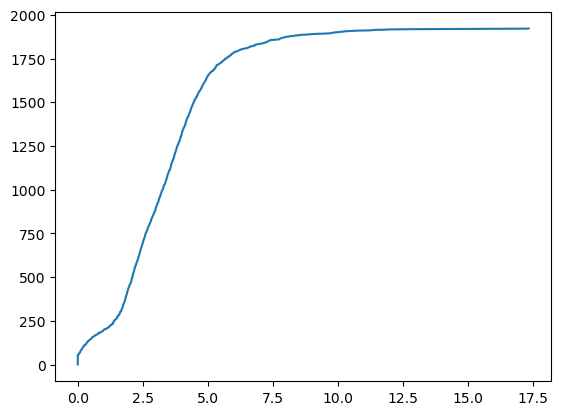

In [ ]:
# cumulative distribution chart for distance std
x = data_use['distance_std']
y = data_use['count']
cumulative_y = [sum(y[:i+1]) for i in range(len(y))]
plt.plot(x, cumulative_y)
plt.savefig('distance_std.png')

In [ ]:
# threshold of distance std
mac_data_agg = mac_data_agg[(mac_data_agg['distance_std'] >= 0) & (mac_data_agg['distance_std'] <= 2)]
mac_data_agg

,ClientMacAddr,distance_mean,distance_median,distance_std,speed_mean,speed_median,speed_std,speed_max
0,00:00:11:11:31:10,0.034513,0.0,0.185861,0.003451,0.0,0.018586,0.100089
3,00:24:d6:9c:70:a6,0.179974,0.0,1.003776,0.004981,0.0,0.031401,0.201116
4,00:26:c6:6d:02:3e,0.687991,0.0,1.825978,0.076074,0.0,0.255368,32.006141
7,00:27:15:ea:e7:2b,0.106713,0.0,0.500527,0.010671,0.0,0.050053,0.234768
8,00:28:f8:26:ae:e4,0.153713,0.0,0.517280,0.016081,0.0,0.061019,19.226552
...,...,...,...,...,...,...,...,...
1905,f8:63:3f:68:f0:2e,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
1907,f8:63:3f:be:61:58,0.515907,0.0,1.715414,0.054790,0.0,0.246080,11.661560
1913,f8:94:c2:49:80:c7,0.021967,0.0,0.359504,0.001566,0.0,0.013560,0.457208
1919,f8:da:0c:56:43:63,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000


In [ ]:
data_use = mac_data_agg[['ClientMacAddr', 'distance_mean']]
data_use = data_use.sort_values('distance_mean',ascending = True)
data_use['count'] = 1
data_use

,ClientMacAddr,distance_mean,count
232,28:3f:69:d8:f8:19,0.000000,1
252,2c:dc:ad:4c:c2:c4,0.000000,1
1437,a0:c5:89:a1:af:09,0.000000,1
1447,a4:c3:f0:33:6d:f0,0.000000,1
1448,a4:c3:f0:4a:7a:0e,0.000000,1
...,...,...,...
157,20:16:b9:76:30:d1,0.857864,1
841,74:6f:f7:1b:84:c8,0.912786,1
1511,a4:c3:f0:a5:f1:32,0.956189,1
1633,d4:38:9c:ec:89:d6,0.991856,1


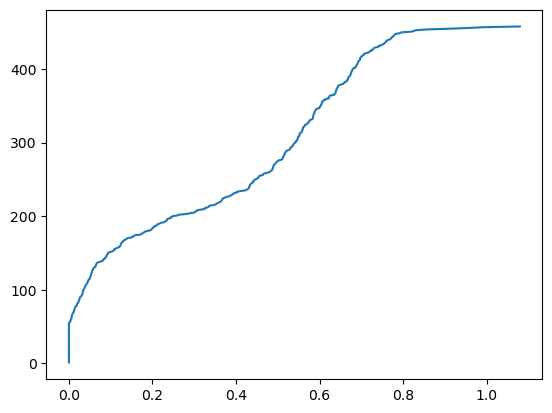

In [ ]:
# cumulative distribution chart for distance mean
x = data_use['distance_mean']
y = data_use['count']
cumulative_y = [sum(y[:i+1]) for i in range(len(y))]
plt.plot(x, cumulative_y)
plt.savefig('distance_mean.png')

In [ ]:
# threshold of distance mean
mac_data_agg = mac_data_agg[(mac_data_agg['distance_mean'] >= 0) & (mac_data_agg['distance_mean'] <= 0.4)]
mac_data_agg

,ClientMacAddr,distance_mean,distance_median,distance_std,speed_mean,speed_median,speed_std,speed_max
0,00:00:11:11:31:10,0.034513,0.0,0.185861,0.003451,0.0,0.018586,0.100089
3,00:24:d6:9c:70:a6,0.179974,0.0,1.003776,0.004981,0.0,0.031401,0.201116
7,00:27:15:ea:e7:2b,0.106713,0.0,0.500527,0.010671,0.0,0.050053,0.234768
8,00:28:f8:26:ae:e4,0.153713,0.0,0.517280,0.016081,0.0,0.061019,19.226552
17,00:6f:5f:1d:f5:d6,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...
1890,f8:59:71:27:fc:04,0.031551,0.0,0.185532,0.002947,0.0,0.016997,0.130522
1905,f8:63:3f:68:f0:2e,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
1913,f8:94:c2:49:80:c7,0.021967,0.0,0.359504,0.001566,0.0,0.013560,0.457208
1919,f8:da:0c:56:43:63,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000


In [ ]:
# Fixed device from TBD category
# save as csv
mac_data_agg.to_csv('Fixed_device_from_TBD.csv', index=False)

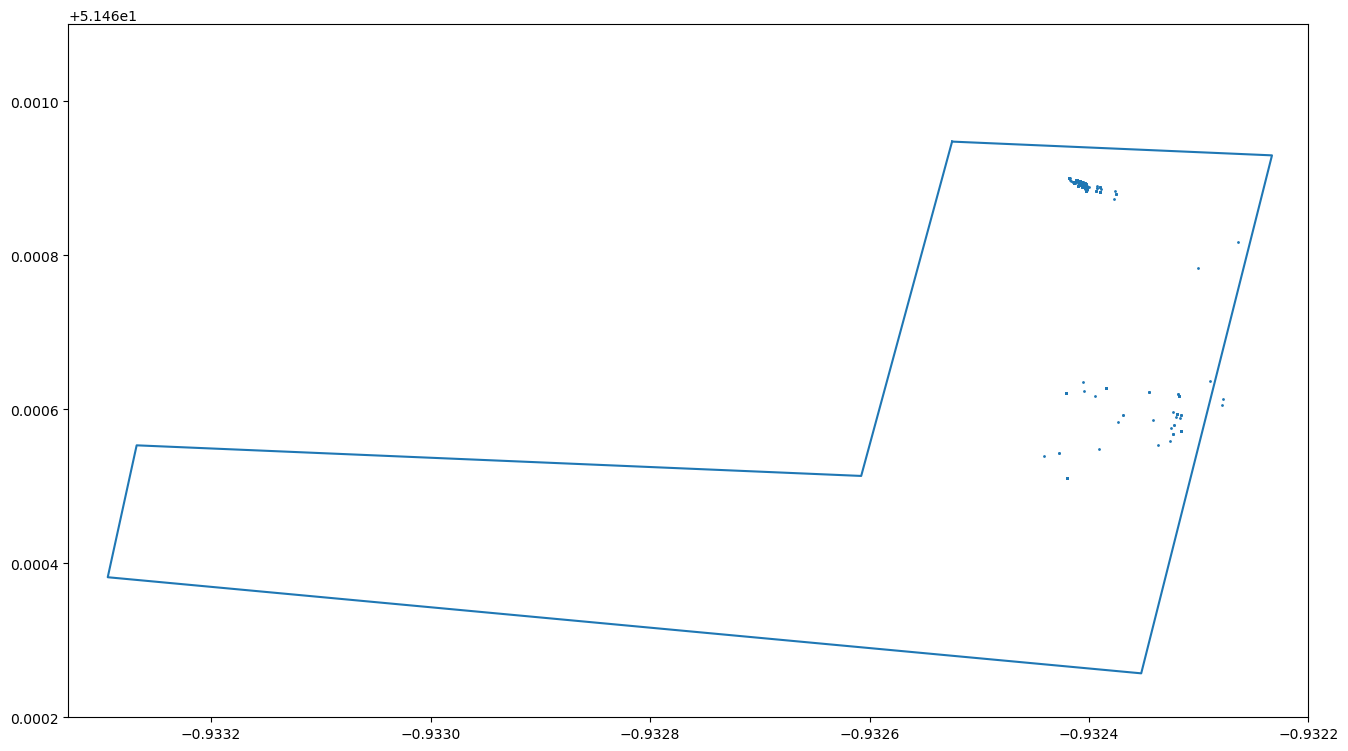

In [ ]:
# test1

use_data = data[data['ClientMacAddr']=='e4:a4:71:8d:6e:4f']

plt.figure(figsize=(16,9))

y = [51.46094763183397, 
     51.46092976598236,
     51.460257062787136,
     51.460381876470784,
     51.46055317954987,
     51.46051343244503,
     51.46094763183397]
x = [-0.9325247751707785,
     -0.9322332468412318,
     -0.9323524232674887,
     -0.9332942187946636,
     -0.9332678677279798,
     -0.9326075994237232,
     -0.9325247751707785]
     

# Plot the L-shaped object
plt.plot(x, y)
plt.scatter('lng','lat',data = use_data, s = 1)
# Set the x and y limits
plt.ylim(51.4602, 51.4611)
plt.xlim(-0.93333, -0.9322)

# Show the plot18:5e:0f:ec:f0:77
plt.show()

In [ ]:
data[data['ClientMacAddr']=='00:6f:5f:1d:f5:d6']

,ClientMacAddr,localtime,Site,Level,lat,lng,date
3330031,00:6f:5f:1d:f5:d6,2019-09-03 11:51:27,UK Office,1st Floor,51.460494,-0.933221,2019-09-03
3330032,00:6f:5f:1d:f5:d6,2019-09-03 11:51:37,UK Office,1st Floor,51.460494,-0.933221,2019-09-03
3330033,00:6f:5f:1d:f5:d6,2019-09-03 11:51:47,UK Office,1st Floor,51.460494,-0.933221,2019-09-03
3330034,00:6f:5f:1d:f5:d6,2019-09-03 11:51:57,UK Office,1st Floor,51.460494,-0.933221,2019-09-03
3330035,00:6f:5f:1d:f5:d6,2019-09-03 11:52:07,UK Office,1st Floor,51.460494,-0.933221,2019-09-03
3330036,00:6f:5f:1d:f5:d6,2019-09-03 11:52:17,UK Office,1st Floor,51.460494,-0.933221,2019-09-03
3330037,00:6f:5f:1d:f5:d6,2019-09-03 11:52:27,UK Office,1st Floor,51.460494,-0.933221,2019-09-03
3330038,00:6f:5f:1d:f5:d6,2019-09-03 11:52:38,UK Office,1st Floor,51.460494,-0.933221,2019-09-03
3330039,00:6f:5f:1d:f5:d6,2019-09-03 11:52:48,UK Office,1st Floor,51.460494,-0.933221,2019-09-03
3330040,00:6f:5f:1d:f5:d6,2019-09-03 11:52:58,UK Office,1st Floor,51.460494,-0.933221,2019-09-03


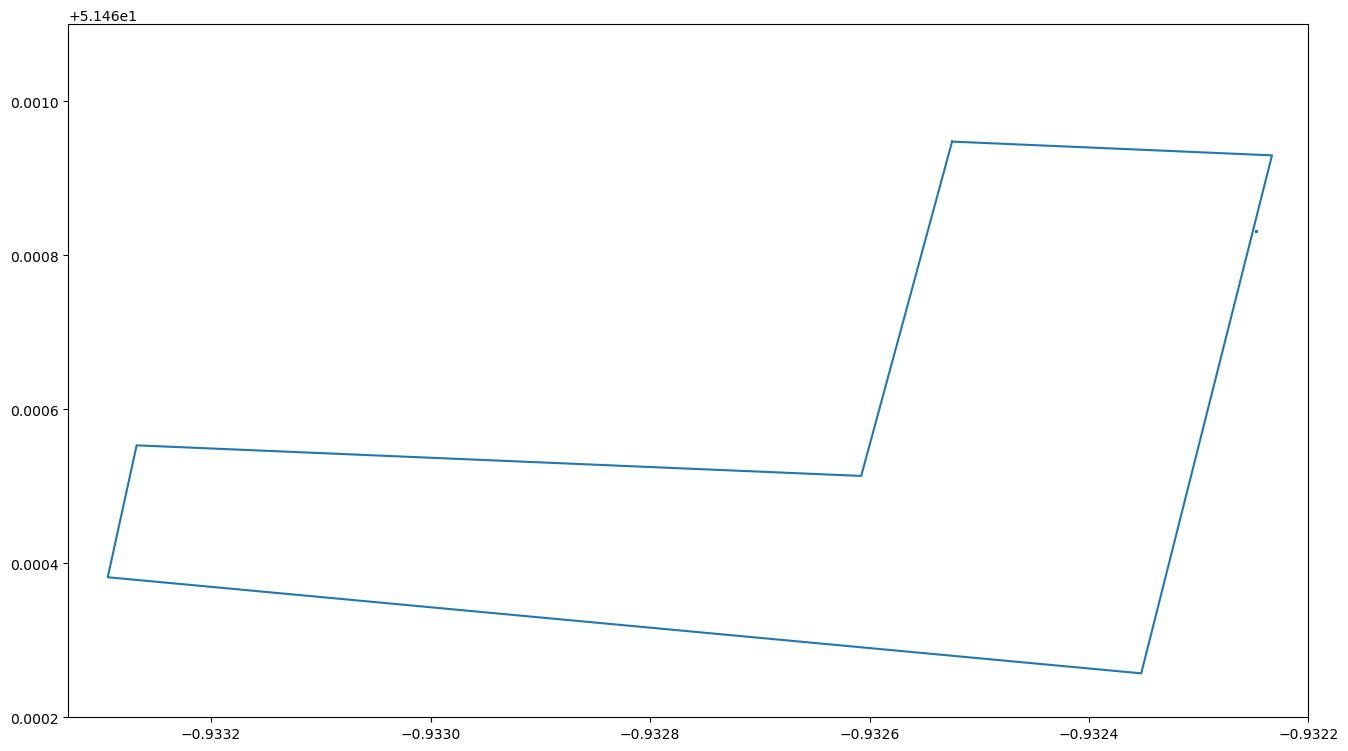

In [ ]:
# test2

use_data = data[data['ClientMacAddr']=='f8:da:0c:56:43:63']

plt.figure(figsize=(16,9))

y = [51.46094763183397, 
     51.46092976598236,
     51.460257062787136,
     51.460381876470784,
     51.46055317954987,
     51.46051343244503,
     51.46094763183397]
x = [-0.9325247751707785,
     -0.9322332468412318,
     -0.9323524232674887,
     -0.9332942187946636,
     -0.9332678677279798,
     -0.9326075994237232,
     -0.9325247751707785]
     

# Plot the L-shaped object
plt.plot(x, y)
plt.scatter('lng','lat',data = use_data, s = 1)
# Set the x and y limits
plt.ylim(51.4602, 51.4611)
plt.xlim(-0.93333, -0.9322)

# Show the plot18:5e:0f:ec:f0:77
plt.show()